# Gaia distances to Cygnus X

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from astropy.table import Table

In [11]:
%matplotlib inline
sns.set_color_codes()

In [3]:
tab = Table.read("../data/Cygnus/Gaia/1553609645651O-result.vot")

In [4]:
tab

source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,radial_velocity,radial_velocity_error,phot_variable_flag,teff_val,a_g_val
,deg,mas,deg,mas,mas,mas,mas.yr**-1,mas.yr**-1,mas.yr**-1,mas.yr**-1,mag,mag,mag,mag,km.s**-1,km.s**-1,,K,mag
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float64,float64,object,float32,float32
2067785105283609600,308.32084889233192,0.034366724371772885,41.355848118473844,0.044952134837232018,0.52065324068395724,0.047818702835390844,-2.7140252634106341,0.080918530953545842,-4.2850436589085525,0.083598564405043707,15.88494,17.144339,14.739866,2.4044724,--,--,NOT_AVAILABLE,3455.5,2.6305001
2067780462421871232,308.36562391714466,0.033165792645522572,41.224340351741994,0.04077978597155052,0.61409828114633036,0.044294851646467646,-2.7595050914196704,0.069463084598882494,-4.5574723657723499,0.076685205896479008,15.580177,16.825531,14.4486,2.3769312,--,--,NOT_AVAILABLE,3601.0,2.5304999
2067784383729101696,308.3472319790244,0.026174910753561712,41.338089482321074,0.039118293234769057,0.53418730715644369,0.039317819193625002,-2.6693643505684328,0.059568525769833437,-4.3164276526735961,0.069759348620649864,12.963275,13.960228,11.953214,2.0070143,--,--,NOT_AVAILABLE,3757.97,1.3954999
2067779882603124224,308.42506644619903,0.033710360356239574,41.221980183974843,0.042168333231967121,0.68138427550649494,0.046637036164102662,-2.6480273223723882,0.073023156017181248,-4.3225213193143519,0.080312151771883514,15.644829,17.02659,14.456615,2.5699749,--,--,NOT_AVAILABLE,3851.0151,2.7735
2067784692966539904,308.29604885061804,0.035749495719936145,41.318952458950406,0.051330514699422645,0.56666294081886326,0.049727927777657638,-2.7884724080456276,0.078445651806579961,-4.4960874671506357,0.086824863676338696,15.933296,--,--,--,--,--,NOT_AVAILABLE,--,--
2067784658606801664,308.2859327036731,0.024541621760822627,41.308666157298582,0.033084136449819154,0.64437269852878298,0.033830586037971955,-2.7598584445857317,0.054122947383110992,-4.6105561251360321,0.056457707644668481,15.441234,16.585039,14.35068,2.2343588,--,--,NOT_AVAILABLE,3799.0,2.428
2067779779523905792,308.42640370042443,0.023027639522788395,41.195965311228491,0.030425942965798751,0.61394441777656572,0.03250381764215212,-2.5817292919265995,0.049657239072004825,-4.6973028319043557,0.055888517212005134,12.853316,14.099507,11.732874,2.3666334,--,--,NOT_AVAILABLE,3856.75,2.1110001
2067785070923663104,308.30877429050742,0.023467011681206257,41.339398496781584,0.028478184358138432,0.62476209309296327,0.02984016682729446,-2.724231829766508,0.051495376741205981,-4.4382729433006922,0.051520787279048345,9.7405491,10.750272,8.7605743,1.9896975,--,--,NOT_AVAILABLE,4159.0552,--


In [5]:
df = tab.to_pandas()

In [8]:
df.describe()

,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,radial_velocity,radial_velocity_error,teff_val,a_g_val
count,7.400000e+01,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,72.000000,72.000000,72.000000,0.0,0.0,72.000000,67.000000
mean,2.067809e+18,308.323616,0.026776,41.303700,0.035765,0.577010,0.037155,-2.596971,0.059305,-4.450138,0.065316,14.104885,15.262299,12.988788,2.273511,NaN,NaN,3813.107666,2.172288
std,3.979801e+13,0.091170,0.005611,0.064526,0.007219,0.051257,0.007677,0.128309,0.013252,0.139502,0.013462,1.576240,1.618986,1.559811,0.282451,NaN,NaN,256.076019,0.505807
min,2.067780e+18,308.134652,0.014675,41.183157,0.018666,0.476464,0.020565,-2.788472,0.032066,-4.757175,0.036139,9.479446,10.372652,8.561418,1.747189,NaN,NaN,3316.000000,0.984500
25%,2.067783e+18,308.270165,0.022783,41.252770,0.030226,0.541721,0.030821,-2.691792,0.050107,-4.543550,0.055714,13.289180,14.342338,12.142041,2.033786,NaN,NaN,3654.978088,1.867000
50%,2.067785e+18,308.325537,0.026946,41.305831,0.036225,0.571598,0.038185,-2.619726,0.059324,-4.460660,0.064266,14.383642,15.592327,13.272636,2.256327,NaN,NaN,3790.854980,2.336000
75%,2.067832e+18,308.364585,0.031381,41.343337,0.042180,0.605747,0.043404,-2.527236,0.071087,-4.323613,0.076235,15.314826,16.590017,14.210736,2.478561,NaN,NaN,3949.027527,2.553250
max,2.067927e+18,308.535213,0.035749,41.473969,0.051331,0.709314,0.049728,-2.233942,0.082541,-4.207163,0.091141,16.263514,17.387806,15.161366,3.001262,NaN,NaN,4587.395020,2.887000


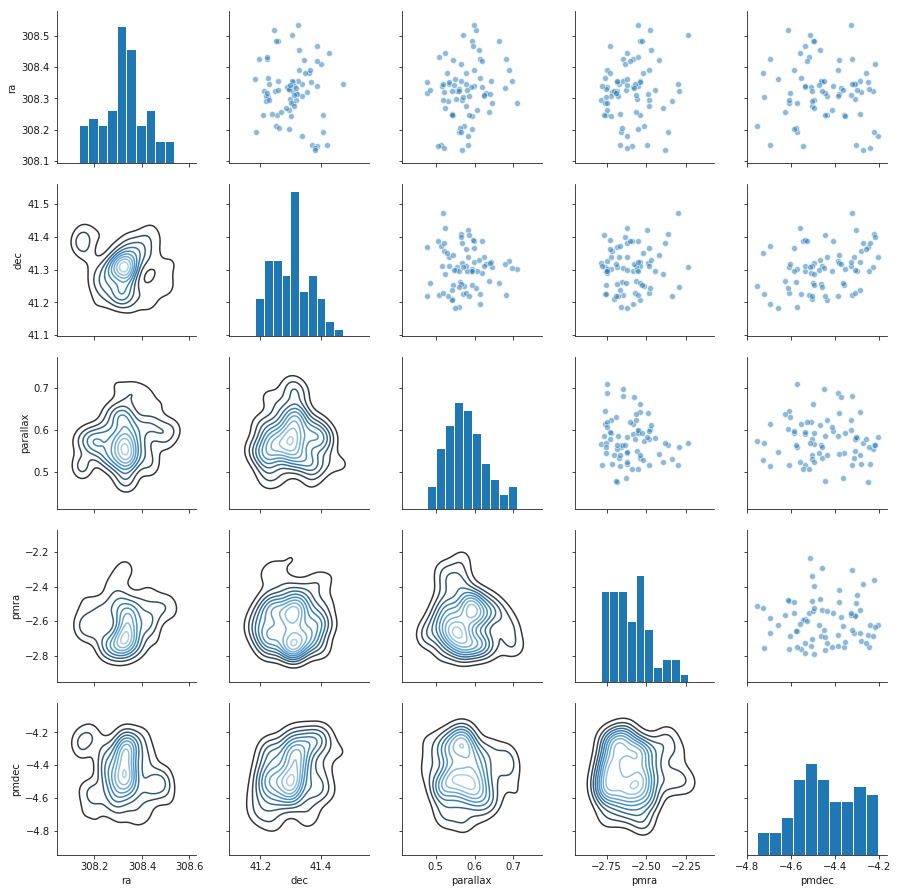

In [12]:
columns = ['ra', 'dec', 'parallax', 'pmra', 'pmdec']
g = sns.PairGrid(df, 
                 vars=columns, 
                )
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_upper(plt.scatter, alpha=0.5, edgecolor='w')
g = g.map_lower(sns.kdeplot, cmap="Blues_d")

## Now do a wider area

This time it is 30 arcmin radius around 20:33:16 +41:18:41 

Parallax error < 0.05 and proper motion limits: -3.5 to -1.5 in RA, -5.5 to -3.5 in Dec

In [21]:
ddf = Table.read("../data/Cygnus/Gaia/1553612017852O-result.vot").to_pandas()


In [22]:
m = (ddf.parallax > 0.3) & (ddf.parallax < 0.85)
ddf[m].describe()

,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,radial_velocity,radial_velocity_error,teff_val,a_g_val
count,5.070000e+02,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,503.000000,503.000000,503.000000,6.000000,6.000000,503.000000,397.000000
mean,2.067797e+18,308.245845,0.027535,41.315991,0.033685,0.581205,0.036995,-2.611750,0.060643,-4.271886,0.063539,14.401882,15.567967,13.312609,2.255360,-0.392395,4.694771,3863.422363,2.274188
std,3.037151e+14,0.229169,0.006380,0.204722,0.007548,0.074696,0.007799,0.381694,0.014508,0.470303,0.014874,1.498396,1.559404,1.483111,0.370970,64.155097,6.605900,290.154999,0.557741
min,2.064757e+18,307.666902,0.012987,40.820689,0.015285,0.330946,0.017235,-3.984718,0.026516,-5.948205,0.027010,8.420189,9.294252,7.510353,0.878779,-47.198441,0.288821,3229.000000,0.342000
25%,2.067782e+18,308.088918,0.022966,41.186345,0.027987,0.537802,0.031233,-2.832898,0.050504,-4.533177,0.052648,13.676778,14.826710,12.600218,1.981550,-36.034597,1.128364,3667.000000,2.017000
50%,2.067832e+18,308.275524,0.027703,41.338085,0.033626,0.575870,0.037470,-2.614628,0.060457,-4.285044,0.063479,14.827534,15.997899,13.717753,2.258016,-21.223204,2.437330,3841.320068,2.428000
75%,2.067852e+18,308.408980,0.032333,41.458237,0.039709,0.614575,0.043615,-2.380764,0.071242,-4.006635,0.075634,15.489210,16.693716,14.415692,2.555026,-3.277247,3.958556,4009.218750,2.707000
max,2.067947e+18,308.905747,0.068460,41.786833,0.056951,0.849323,0.049966,-1.206562,0.147677,-3.007402,0.099983,16.353426,17.770870,15.410385,3.216609,125.557466,17.847468,5756.000000,2.939000


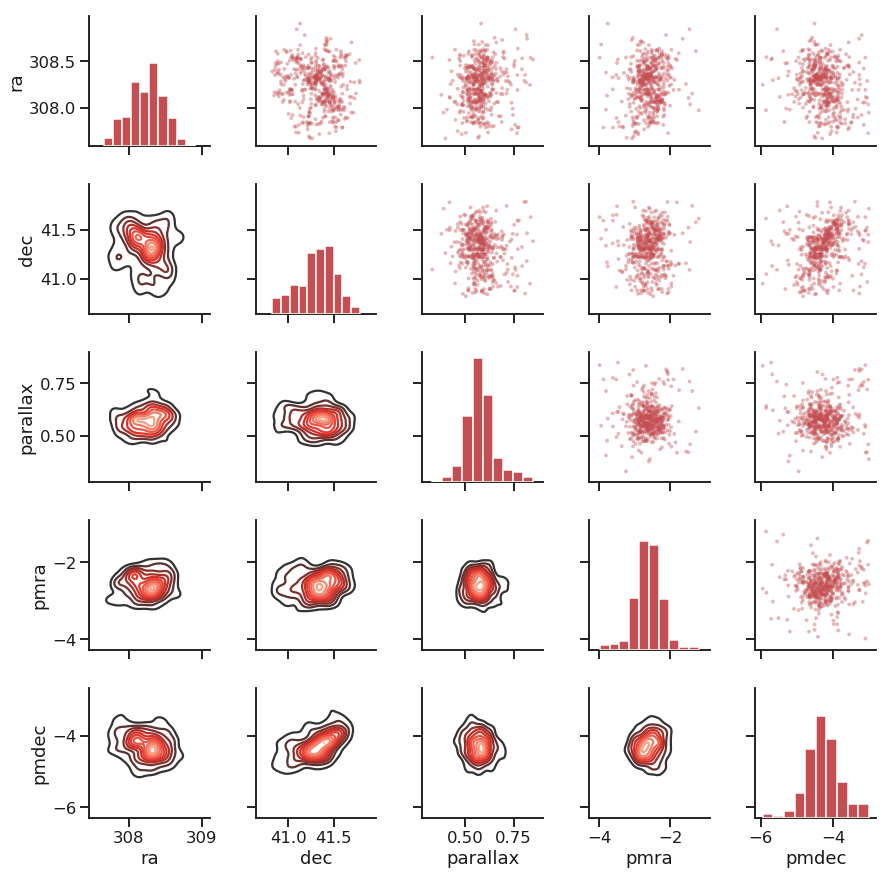

In [34]:
sns.set_context("talk")
columns = ['ra', 'dec', 'parallax', 'pmra', 'pmdec']
g = sns.PairGrid(ddf[m], 
                 vars=columns, 
                )
g = g.map_diag(plt.hist, color="r", edgecolor="w")
g = g.map_upper(plt.scatter, s=15, color="r", alpha=0.4, edgecolor='none')
g = g.map_lower(sns.kdeplot, cmap="Reds_d")
g.fig.savefig("cygnus-x-gaia-pairplot.pdf")

In [25]:
ddf[m][columns].corr()

,ra,dec,parallax,pmra,pmdec
ra,1.000000,-0.144741,0.154828,0.111572,-0.200610
dec,-0.144741,1.000000,-0.104507,0.050093,0.281234
parallax,0.154828,-0.104507,1.000000,-0.020283,0.005472
pmra,0.111572,0.050093,-0.020283,1.000000,0.086339
pmdec,-0.200610,0.281234,0.005472,0.086339,1.000000


In [31]:
g.fig?